In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.regularizers import l2
import tensorflow as tf

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 16928)             0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [22]:
image_generator = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest')

image_generator_test = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest')


In [23]:
train_data = image_generator.flow_from_directory(
    '../datasets/images/training/',
    target_size=(100, 100),
    color_mode="rgb",
    class_mode='categorical',
    batch_size=32
)

Found 1098 images belonging to 10 classes.


In [24]:
test_data = image_generator_test.flow_from_directory(
    '../datasets/images/validation/',
    target_size=(100, 100),
    color_mode="rgb",
    class_mode='categorical',
    batch_size=32
)

Found 272 images belonging to 10 classes.


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(train_data , steps_per_epoch=len(train_data), epochs=50 , validation_data=test_data, validation_steps=len(test_data))

Epoch 1/50
35/35 [==============================] - 49s 1s/step - loss: 2.2942 - accuracy: 0.1412 - val_loss: 2.1295 - val_accuracy: 0.2390
Epoch 2/50
35/35 [==============================] - 48s 1s/step - loss: 1.9397 - accuracy: 0.2860 - val_loss: 1.8136 - val_accuracy: 0.3419
Epoch 3/50
35/35 [==============================] - 47s 1s/step - loss: 1.6463 - accuracy: 0.3980 - val_loss: 1.7256 - val_accuracy: 0.3382
Epoch 4/50
35/35 [==============================] - 51s 1s/step - loss: 1.5700 - accuracy: 0.4317 - val_loss: 1.5170 - val_accuracy: 0.4412
Epoch 5/50
35/35 [==============================] - 50s 1s/step - loss: 1.4578 - accuracy: 0.4754 - val_loss: 1.4926 - val_accuracy: 0.4669
Epoch 6/50
35/35 [==============================] - 50s 1s/step - loss: 1.3645 - accuracy: 0.5018 - val_loss: 1.4323 - val_accuracy: 0.5110
Epoch 7/50
35/35 [==============================] - 50s 1s/step - loss: 1.2897 - accuracy: 0.5392 - val_loss: 1.4292 - val_accuracy: 0.5221
Epoch 8/50
35/35 [==

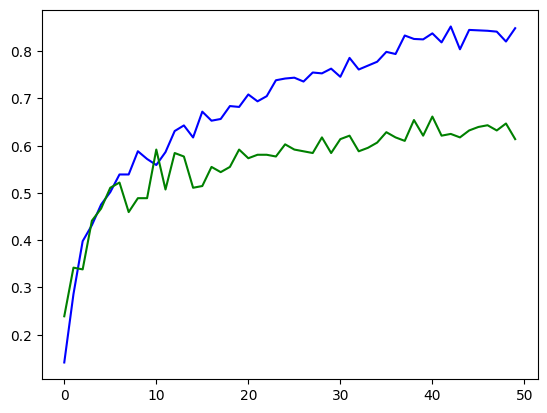

In [27]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='green')